### Curve Fitting using Backpropagation
***Author: Pratyush Bagaria (pbagar2@uic.edu)***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
def inputOutputGraphPlotter(x,d):
    plt.title("Points (x,d)\n",fontsize=16)
    plt.xlabel('x-values',fontsize=14)
    plt.ylabel('d-values',fontsize=14)
    plt.scatter(x, d, color = 'black')
    plt.tight_layout(rect=[0, 0, 2, 2])
    plt.show()

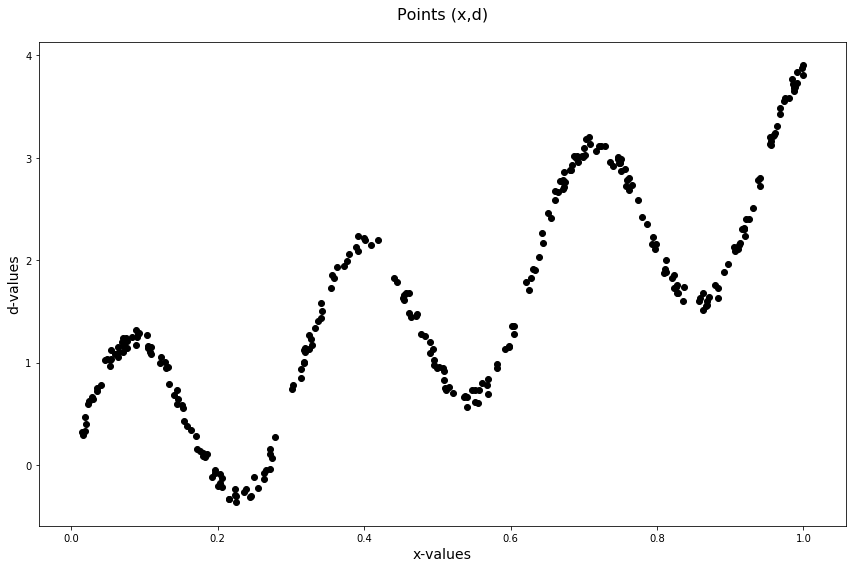

In [3]:
n = 300
eta = 0.5
N = 24
x = [random.uniform(0,1) for i in range(0,n)]
v = [random.uniform(-0.1,0.1) for i in range(0,n)]
d = [math.sin(20*x[i])+(3*x[i])+v[i] for i in range(0,n)]
w1 = [random.uniform(-10,10) for i in range(0,N)]
w2 = [random.uniform(-10,10) for i in range(0,N)]
b1 = [random.uniform(-1,1) for i in range(0,N)]
b2 = [random.uniform(-1,1) for i in range(0,1)]
inputOutputGraphPlotter(x,d)

In [4]:
def feedForward(w1, w2, b1, b2, xi):
    ai = np.add(np.dot(np.asarray(w1)[:,None],np.array([xi])), b1).tolist()
    zi = [np.tanh(j) for j in ai]
    yi = np.add(np.dot(np.asarray(w2),np.asarray(zi)[:,None]), b2).tolist()[0]
    return (ai, zi, yi)

In [5]:
def backPropagation(x, d, w1, w2, b1, b2, a, z, y, i):
    delta_w1 = [((-2*x[i])/n)*(d[i] - y)* w2[j]*(1 - np.tanh(a[j])**2) for j in range(0,N)]
    delta_w2 = [(-2/n)*j*(d[i] - y) for j in z]
    delta_b1 = [(-2/n) * (d[i] - y)*w2[j]*(1 - np.tanh(a[j])**2) for j in range(0,N)]
    delta_b2 = [((-2/n) * (d[i] - y))]
    return (delta_w1, delta_w2, delta_b1, delta_b2)

In [6]:
def MSE(d, y):
    mse = 0
    for i in range(0,n):
        mse += (d[i] - y[i])**2
    return (mse/n)

In [7]:
def graphPlotterEpochsVsMSE(e,m):
    plt.title("Epochs Vs Mean Squared Errors\n",fontsize=16)
    plt.xlabel('epochs',fontsize=14)
    plt.ylabel('mean squared errors',fontsize=14)
    plt.scatter(e,m)
    plt.tight_layout(rect=[0, 0, 2, 2])
    plt.show()

In [8]:
def batchLearn(x, w1, w2, b1, b2):
    a,z,y = [],[],[]
    for i in x:
        ai = np.add(np.dot(np.asarray(w1)[:,None],np.array([i])), b1)
        a.append(ai.tolist())
        zi = [np.tanh(j) for j in ai]
        z.append(zi)
        yi = np.add(np.dot(np.asarray(w2),np.asarray(zi)[:,None]), b2)
        y.append(yi.tolist()[0])
    return (y)

In [10]:
def graphPlotterFittedCurveAndInitialPoints(x,d,y):
    plt.xlabel('x values',fontsize=14)
    plt.ylabel('d & Y values',fontsize=14)
    plt.plot(x, d, 'o', color = 'black', label='Inital Points')
    plt.plot(x, y, '.', color = 'red', label='Curve Fitted')
    plt.legend(loc='best')
    plt.tight_layout(rect=[0, 0, 2, 2])
    plt.show()

In [11]:
epoch = 1
epochs = []
MeanSquaredErrors = []
while(True):
    y = []
    for i in range(0, n):
        ai, zi, yi = feedForward(w1, w2, b1, b2, x[i])
        delta_w1, delta_w2, delta_b1, delta_b2 = backPropagation(x,d,w1,w2,b1,b2,ai,zi,yi,i)
        w1 = np.subtract(np.asarray(w1), np.dot(eta, np.asarray(delta_w1))).tolist()
        w2 = np.subtract(np.asarray(w2), np.dot(eta, np.asarray(delta_w2))).tolist()
        b1 = np.subtract(np.asarray(b1), np.dot(eta, np.asarray(delta_b1))).tolist()
        b2 = np.subtract(np.asarray(b2), np.dot(eta, np.asarray(delta_b2))).tolist()
        y.append(yi)
    mse = MSE(d, y)
    epochs.append(epoch)
    epoch += 1
    MeanSquaredErrors.append(mse)
    if(mse < 0.01):
        break

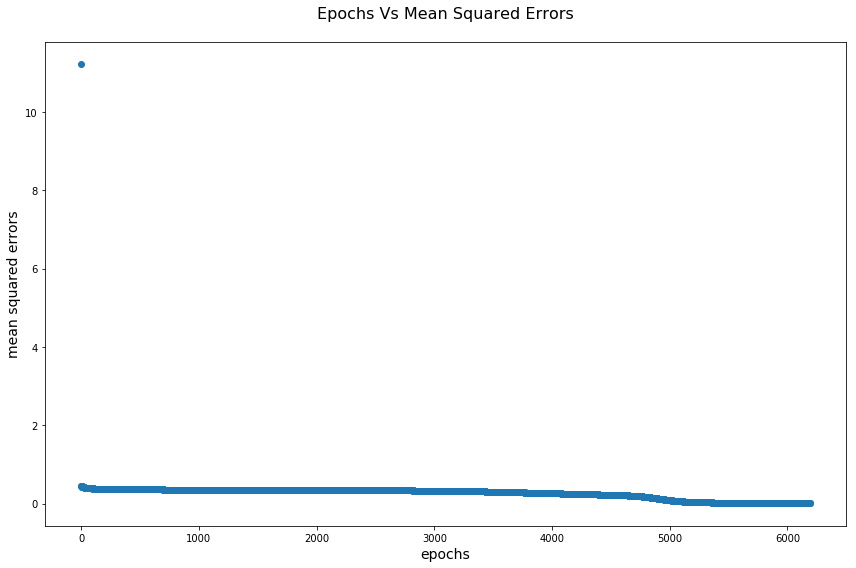

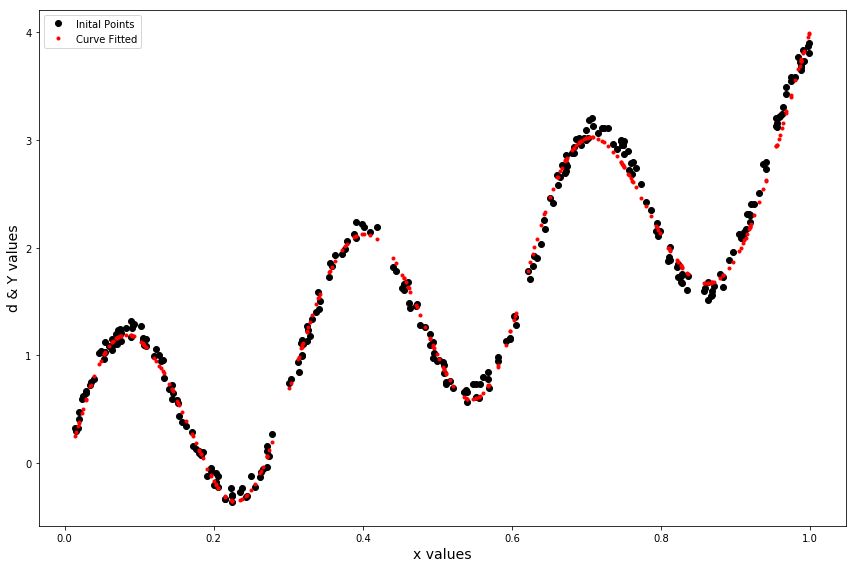

In [12]:
graphPlotterEpochsVsMSE(epochs,MeanSquaredErrors)
Y = batchLearn(x, w1, w2, b1, b2)
graphPlotterFittedCurveAndInitialPoints(x,d,Y)

#### <u><i>Pseudocode:</i></u>
1. initialize: n=300, N=24, eta=0.5 (or any real no. between 0 & 1) which corresponds to n-inputs, N-neurons and learning rate
2. initialize: n real numbers in between [0,1] and [-0.1,0.1] in x and v respectively.
3. calculate: _d = sin(20*x) + (3*x) + v_ for all x and v values
4. plot (x,d) points
5. initialize: N real numbers in between [-10,10] in w1 representing N Hidden Neurons Weights
6. initialize: N real numbers in between [-10,10] in w2 representing N Weights of Output Layer Neuron
7. initialize: N real numbers in between [-1,1] in b1 representing N Hidden Neurons Biases
8. initialize: a real number in between [-1,1] in b2 representing bias of Output Layer Neuron
9. initialize: epoch = 1
10. do<br>
     a. for i = 0 to n
         i. calc: induced local fields, ai = w1*x[i]+b1,
                  zi = tanh(ai), and
                  induced local field for output layer, say yi = w2*z[i]+b2  
         ii. calc for j=0 to N: delta_w1=(-2*x[i])/n*(d[i]-y[i])*w2[j]*(1-np.tanh(a[j])^2)
                                delta_w2=(-2/n)*j*(d[i]-y[i])
                                delta_b1=(-2/n)*(d[i]-y[i])*w2[j]*(1-np.tanh(a[j])^2)
                                delta_b2=(-2/n)*(d[i]-y[i])
         iii. update weights and biases as: w1=w1-eta*delta_w1
                                            w2=w2-eta*delta_w2
                                            b1=b1-eta*delta_b1
                                            b2=b2-eta*delta_b2
     b. inilitalize mse = 0 and for k = 0 to n, calculate mse=mse+(d[k]-y[ik])^2<br>
     c. calculate: mse = mse/n<br>
     d. increment epoch <br>
     e. continue while mse >= 0.01 else terminate<br>
11. plot epoch vs MSE graph
12. perform following batch learning to get final Y-values: for all inputs xi in x, calculate,
    * ai = w1*xi+b1 and keep storing in array a<br>
    * zi = tanh(ai) and keep storing in array z<br>
    * yi = w2*zi+b2 and keep storing in array Y<br>
13. plot (x,d) and (x,Y) in a graph to compare